In [91]:
import nltk 
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem import SnowballStemmer,PorterStemmer,WordNetLemmatizer
from nltk.corpus import stopwords,wordnet
from nltk.tag import pos_tag
from textblob import Word
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import pickle

### Read Data

In [93]:
data = pd.read_csv("news.csv")

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [94]:
data=data.rename(columns={"Unnamed: 0":"ids"})

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ids     6335 non-null   int64 
 1   title   6335 non-null   object
 2   text    6335 non-null   object
 3   label   6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [96]:
## Show duplicated in data
data["ids"].duplicated().value_counts()

ids
False    6335
Name: count, dtype: int64

### preprocessing

In [107]:
tages_map={
    "DT":None, 
    "CC":None,
    "FW":None, 
    "LS":None,
    "MD":None,
    "POS":None, 
    "PRP":None, 
    "PRP$":None, 
    "TO":None , 
    "UH":None , 
    "SYM":None, 
    "WDT":None, 
    "CD":wordnet.NOUN,
    "NN":wordnet.NOUN,
    "NNS":wordnet.NOUN,
    "NNP":wordnet.NOUN,
    "NNPS":wordnet.NOUN,
    "WP":wordnet.NOUN,
    "WP$":wordnet.NOUN,
    "EX":wordnet.ADV, 
    "WRB":wordnet.ADV, 
    "IN":wordnet.ADV,
    "RB":wordnet.ADV, 
    "RBR":wordnet.ADV,
    "RBS":wordnet.ADV,
    "JJ":wordnet.ADJ_SAT, 
    "JJR":wordnet.ADJ_SAT,
    "JJS":wordnet.ADJ_SAT,
    "RP":wordnet.ADJ_SAT,
    "VB":wordnet.VERB,
    "VBD":wordnet.VERB,
    "VBG":wordnet.VERB,
    "VBN":wordnet.VERB,
    "VBP":wordnet.VERB,
    "VBZ":wordnet.VERB,
}

In [108]:
stop_words =stopwords.words("english")

In [109]:
def not_stopwords (input):
    words = ""
    for word in input.split() : 
        if word.casefold() not in stop_words: 
            words =words + " " +word
    return words

In [110]:
def Lemmatize_Text(text ): 
    lemmatized = WordNetLemmatizer()
    lemmatized_words = []
    text = str(text)
    tages  = pos_tag(text.split())
    for word, pos in tages : 
        if pos not in tages_map or tages_map[pos] ==None : 
            lemmatized_words.append(word)
        else: 
            lemma = lemmatized.lemmatize(word , pos=tages_map[pos] )
            lemmatized_words.append(lemma)
    return " ".join(lemmatized_words)   

In [111]:
def Stem_Text(text ): 
    # stem = SnowballStemmer("english") 
    stem = PorterStemmer()
    stem_words = []
    for word in text.split():
        stem_words.append(stem.stem(word))
    return " ".join(stem_words)

In [112]:
def remove_punc(text): 
    remove = re.findall(r"\w+",text)
    return " ".join(remove)

In [113]:
News = data[["title","text","label"]]
News.head()

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [114]:
News.loc[:, "title"] = News["title"].apply(remove_punc)
News.loc[:, "text"] = News["text"].apply(remove_punc)

In [115]:
News.loc[:, "title"] = News["title"].apply(not_stopwords)
News.loc[:, "text"] = News["text"].apply(not_stopwords)

In [116]:
News.loc[:, "title"] = News["title"].apply(Stem_Text)
News.loc[:, "text"] = News["text"].apply(Stem_Text)

In [117]:
# News.loc[:, "title"] = News["title"].apply(Lemmatize_Text)
# News.loc[:, "text"] = News["text"].apply(Lemmatize_Text)

In [118]:
News.head()

,title,text,label
0,smell hillari fear,daniel greenfield shillman journal fellow free...,FAKE
1,watch exact moment paul ryan commit polit suic...,googl pinterest digg linkedin reddit stumbleup...,FAKE
2,kerri go pari gestur sympathi,u secretari state john f kerri said monday sto...,REAL
3,berni support twitter erupt anger dnc tri warn,kayde king kaydeek novemb 9 2016 lesson tonigh...,FAKE
4,battl new york primari matter,primari day new york front runner hillari clin...,REAL


### Tfidf

In [119]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import PassiveAggressiveClassifier


In [120]:
X=News["text"]
y=pd.DataFrame(News['label'])

In [121]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, y)

In [122]:
y_test = np.ravel(y_test)
y_train = np.ravel(y_train)

In [123]:
encoder = preprocessing.LabelEncoder()
encoder.fit(y_train)

LabelEncoder()

In [125]:
y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)

In [127]:
tfidf_vect = TfidfVectorizer()
tfidf_vect.fit(X)

TfidfVectorizer()

In [129]:
xtrain_tfidf =  tfidf_vect.transform(x_train)
xtest_tfidf =  tfidf_vect.transform(x_test)

### model 

In [130]:
def train_model(classifier, X_trainning, target, X_testing):
    classifier.fit(X_trainning, target)
    predictions = classifier.predict(X_testing)
    predict_train = classifier.predict(X_trainning)
    return metrics.accuracy_score(predictions, y_test) ,metrics.accuracy_score(predict_train, target),predictions



In [131]:
def Accuarcy_of_score (model , X_test): 
    predictions = classifier.predict(X_test)
    return metrics.accuracy_score(predictions, y_test)

### model naive bayes

In [135]:
accuracy_test ,accuracy_train , predictions  = train_model(naive_bayes.MultinomialNB(alpha=0.01), xtrain_tfidf, y_train, xtest_tfidf)
print ("Accuracy of test : ", accuracy_test)
print ("Accuracy of train : ", accuracy_train)


Accuracy of test :  0.9002525252525253
Accuracy of train :  0.9705325194695853


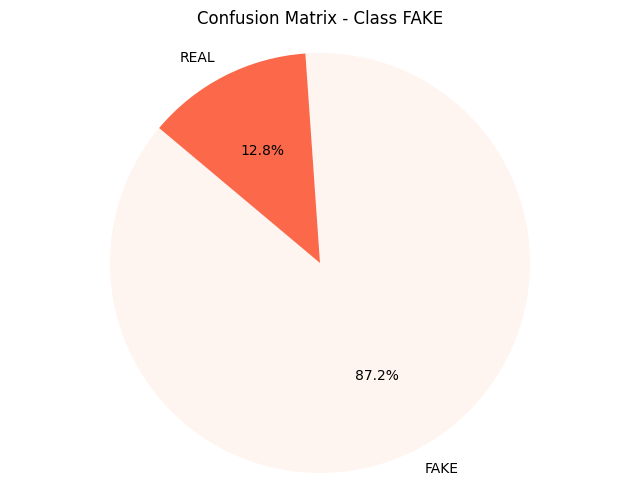

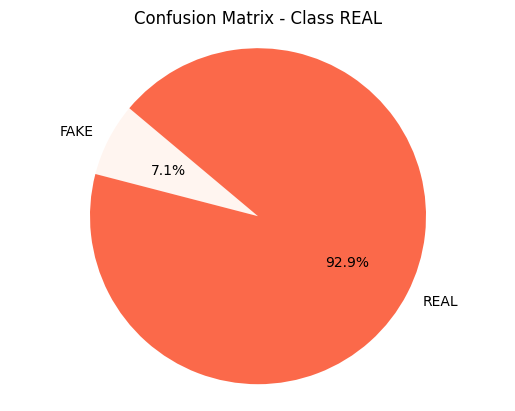

In [137]:
cm = confusion_matrix(y_test, predictions)

class_names = np.unique(np.unique(y))

plt.figure(figsize=(8, 6))
colors = plt.cm.Reds(np.linspace(0, 0.5, len(class_names)))
for i in range(len(class_names)):
    plt.pie(cm[i], labels=class_names, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.title(f'Confusion Matrix - Class {class_names[i]}')
    plt.axis('equal') 
    plt.show()


### model logistic

In [141]:
# Linear Classifier on Word Level TF IDF Vectors
accuracy_test ,accuracy_train, predictions  = train_model(linear_model.LogisticRegression(), xtrain_tfidf, y_train, xtest_tfidf)
print ("Accuracy of test : ", accuracy_test)
print ("Accuracy of train : ", accuracy_train)

Accuracy of test :  0.9147727272727273
Accuracy of train :  0.9543254051778572


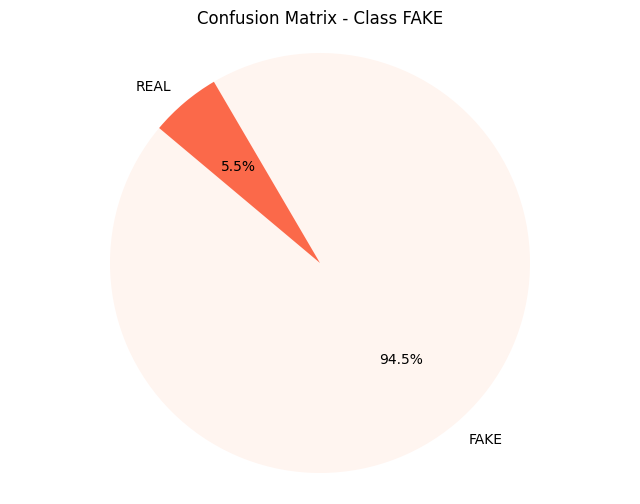

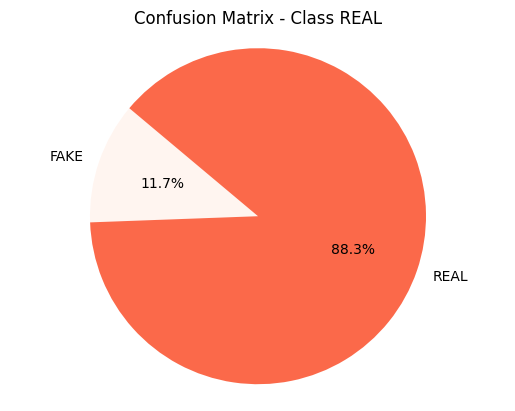

In [143]:

cm = confusion_matrix(y_test, predictions)

class_names = np.unique(np.unique(y))

plt.figure(figsize=(8, 6))
colors = plt.cm.Reds(np.linspace(0, 0.5, len(class_names)))
for i in range(len(class_names)):
    plt.pie(cm[i], labels=class_names, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.title(f'Confusion Matrix - Class {class_names[i]}')
    plt.axis('equal') 
    plt.show()

### PassiveAggressiveClassifier model

In [147]:
accuracy_test ,accuracy_train, predictions  = train_model(PassiveAggressiveClassifier(C=0.01, max_iter=100), xtrain_tfidf, y_train, xtest_tfidf)
print ("Accuracy of test : ", accuracy_test)
print ("Accuracy of train : ", accuracy_train)


Accuracy of test :  0.9330808080808081
Accuracy of train :  0.9846348137234266


In [ ]:

cm = confusion_matrix(y_test, predictions)

class_names = np.unique(np.unique(y))

plt.figure(figsize=(8, 6))
colors = plt.cm.Reds(np.linspace(0, 0.5, len(class_names)))
for i in range(len(class_names)):
    plt.pie(cm[i], labels=class_names, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.title(f'Confusion Matrix - Class {class_names[i]}')
    plt.axis('equal') 
    plt.show()